# N-Fold Cross Validation的基本实现

In [1]:
import numpy as np
import sklearn
from sklearn import model_selection
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 0, 1, 1])
rkf = model_selection.RepeatedKFold(n_splits=2, n_repeats=1, random_state=777)
for train_index, test_index in rkf.split(X):
    print("train_index:{};\ntest_index:{}".format(train_index,test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("X_train:\n{}\n---\n".format(X_train))

train_index:[2 3];
test_index:[0 1]
X_train:
[[5 6]
 [7 8]]
---

train_index:[0 1];
test_index:[2 3]
X_train:
[[1 2]
 [3 4]]
---



# 线性回归模拟--N-Fold Cross Validation

- 我们可以使用N-Fold Cross Validation进行模型参数的选择

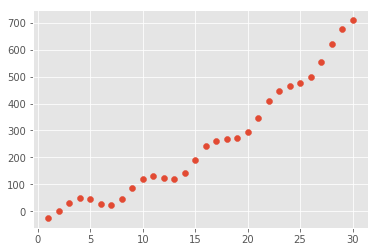

In [3]:
# 生成随机数据
np.random.seed(7)
x = np.linspace(1, 30, 30)
y = 2*x + 0.7*x**2 - 20*np.sin(x) - 20*np.cos(x) + 5*np.random.rand(30)
plt.style.use("ggplot") # 使用美观的样式
plt.scatter(x, y)

我们使用CV进行模型的选择

- model1 : $y=w_1*x + w_2*x^2 + w_3*x^3 + w_4*x^4 + w_5*x^5+ w_6*x^6 + w_7*x^7 + b$
- 我们分别选择L1,L2范数,和不进行正则化
- 惩罚系数我们选择0.5,1,5,10,100

- model2 : $y=w_1*x + b$

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## 首先生成要测试的模型

In [16]:
alpha_list = [0.5,1,5,10]
model_list_Lasso = [Lasso(alpha=i,normalize=True) for i in alpha_list]
model_list_Ridge = [Ridge(alpha=i,normalize=True) for i in alpha_list]

## 数据的划分

In [14]:
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=5, random_state=777) # 这里返回的是index
for train_index, test_index in rkf.split(x):
    print("train_index:{};\ntest_index:{}".format(train_index,test_index))

train_index:[1 3 4 5 6 7 8 9];
test_index:[0 2]
train_index:[0 1 2 4 5 6 7 9];
test_index:[3 8]
train_index:[0 1 2 3 6 7 8 9];
test_index:[4 5]
train_index:[0 2 3 4 5 6 7 8];
test_index:[1 9]
train_index:[0 1 2 3 4 5 8 9];
test_index:[6 7]
train_index:[0 1 2 3 5 7 8 9];
test_index:[4 6]
train_index:[0 2 3 4 5 6 7 8];
test_index:[1 9]
train_index:[1 2 4 5 6 7 8 9];
test_index:[0 3]
train_index:[0 1 3 4 6 7 8 9];
test_index:[2 5]
train_index:[0 1 2 3 4 5 6 9];
test_index:[7 8]
train_index:[1 2 3 4 5 6 7 9];
test_index:[0 8]
train_index:[0 1 2 3 5 7 8 9];
test_index:[4 6]
train_index:[0 1 3 4 5 6 7 8];
test_index:[2 9]
train_index:[0 2 4 5 6 7 8 9];
test_index:[1 3]
train_index:[0 1 2 3 4 6 8 9];
test_index:[5 7]
train_index:[0 2 3 4 6 7 8 9];
test_index:[1 5]
train_index:[1 2 4 5 6 7 8 9];
test_index:[0 3]
train_index:[0 1 2 3 4 5 6 8];
test_index:[7 9]
train_index:[0 1 3 4 5 7 8 9];
test_index:[2 6]
train_index:[0 1 2 3 5 6 7 9];
test_index:[4 8]
train_index:[0 1 2 3 5 7 8 9];
test_inde

## Lasso回归测试

In [17]:
err_list_Lasso = [] # Lasso回归的误差
Polynomia_7 = PolynomialFeatures(degree=7)
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=50, random_state=777) # 这里返回的是index
for model in model_list_Lasso:
    # 每次选出一个模型
    err_list = []
    for train_index, test_index in rkf.split(x):
        # 计算每次的误差
        # 模型的拟合
        x_polynomia7 = Polynomia_7.fit_transform(x[train_index].reshape(-1,1)) # 数据的转换(训练集)
        model.fit(x_polynomia7,y[train_index]) # 计算模型参数
        # 模型的测试
        x_test_polynomia7 = Polynomia_7.fit_transform(x[test_index].reshape(-1,1)) # 数据的转换(测试集)
        model_pre = model.predict(x_test_polynomia7) # 在测试集上预测
        err = mean_squared_error(model_pre,y[test_index]) # 计算误差
        err_list.append(err)
    err_list_Lasso.append(err_list)

In [7]:
np.mean(err_list_Lasso,axis=1)

array([  546.78513009,   574.03049081,  1239.36584367,  3317.2815981 ,
       49488.0452071 ])

In [8]:
np.std(err_list_Lasso,axis=1)

array([  182.93338946,   204.4657538 ,   728.49162234,  2014.75703427,
       21080.8688023 ])

['Lasso_Alpha:0.5', 'Lasso_Alpha:1', 'Lasso_Alpha:5', 'Lasso_Alpha:10', 'Lasso_Alpha:100']


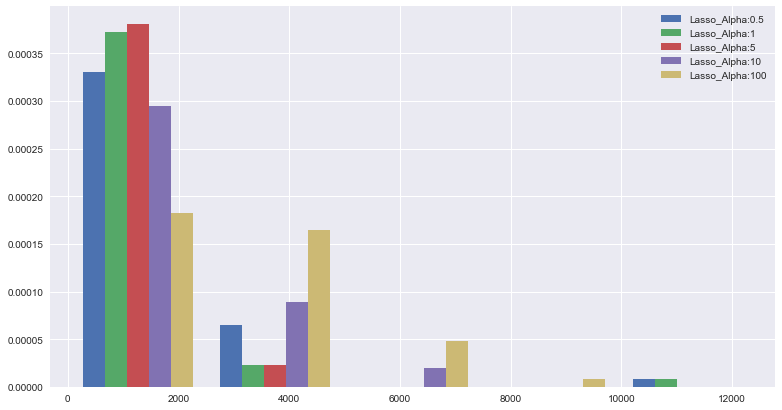

In [72]:
pic_labels = ["Lasso_Alpha:{}".format(i) for i in alpha_list]
print(pic_labels)

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

ax.hist(err_list_Lasso, bins=5, density=True, label=pic_labels)
plt.legend()

## Ridge测试

In [18]:
# Ridge回归测试
err_list_Ridge = [] # Ridge回归的误差
Polynomia_7 = PolynomialFeatures(degree=7)
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=50, random_state=777) # 这里返回的是index
for model in model_list_Ridge:
    # 每次选出一个模型
    err_list = []
    for train_index, test_index in rkf.split(x):
        # 计算每次的误差
        # 模型的拟合
        x_polynomia7 = Polynomia_7.fit_transform(x[train_index].reshape(-1,1)) # 数据的转换(训练集)
        model.fit(x_polynomia7,y[train_index]) # 计算模型参数
        # 模型的测试
        x_test_polynomia7 = Polynomia_7.fit_transform(x[test_index].reshape(-1,1)) # 数据的转换(测试集)
        model_pre = model.predict(x_test_polynomia7) # 在测试集上预测
        err = mean_squared_error(model_pre,y[test_index]) # 计算误差
        err_list.append(err)
    err_list_Ridge.append(err_list)

In [10]:
np.mean(err_list_Ridge,axis=1)

array([ 1680.84905476,  2759.90465169, 11029.46610257, 19313.53535534,
       43772.65122354])

In [11]:
np.std(err_list_Ridge,axis=1)

array([  800.81563627,  1132.12474046,  3286.07691922,  6045.07337409,
       17920.4398436 ])

## 不使用正则化测试

- 这个直接就不能看了，方差很大

In [82]:
err_list_raw = [] # Ridge回归的误差
Polynomia_7 = PolynomialFeatures(degree=7)
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=50, random_state=777) # 这里返回的是index
model = LinearRegression()
for train_index, test_index in rkf.split(x):
    # 计算每次的误差
    # 模型的拟合
    x_polynomia7 = Polynomia_7.fit_transform(x[train_index].reshape(-1,1)) # 数据的转换(训练集)
    model.fit(x_polynomia7,y[train_index]) # 计算模型参数
    # 模型的测试
    x_test_polynomia7 = Polynomia_7.fit_transform(x[test_index].reshape(-1,1)) # 数据的转换(测试集)
    model_pre = model.predict(x_test_polynomia7) # 在测试集上预测
    err = mean_squared_error(model_pre,y[test_index]) # 计算误差
    err_list_raw.append(err)

In [93]:
np.mean(err_list_raw)

22270.725151808416

In [92]:
np.std(err_list_raw)

135720.3250002892

### 训练集数量的影响
有两种增加的方法分别如下所示:
- 在相同区间, 增加采样密度
- 扩大采样区间(好像没有可比较性)

我们使用下面的方法, 都把样本点增加到200个

In [122]:
# 不改变采样区间
np.random.seed(7)
x = np.linspace(1, 12, 200)
y = 2*x + 0.7*x**2 - 20*np.sin(x) - 20*np.cos(x) + 5*np.random.rand(200)

err_list_raw = [] # Ridge回归的误差
Polynomia_7 = PolynomialFeatures(degree=7)
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=50, random_state=777) # 这里返回的是index
model = LinearRegression()
for train_index, test_index in rkf.split(x):
    # 计算每次的误差
    # 模型的拟合
    x_polynomia7 = Polynomia_7.fit_transform(x[train_index].reshape(-1,1)) # 数据的转换(训练集)
    model.fit(x_polynomia7,y[train_index]) # 计算模型参数
    # 模型的测试
    x_test_polynomia7 = Polynomia_7.fit_transform(x[test_index].reshape(-1,1)) # 数据的转换(测试集)
    model_pre = model.predict(x_test_polynomia7) # 在测试集上预测
    err = mean_squared_error(model_pre,y[test_index]) # 计算误差
    err_list_raw.append(err)

print("mean:{},std:{}".format(np.mean(err_list_raw),np.std(err_list_raw)))

mean:3.4351176432823576,std:0.8210432876508236


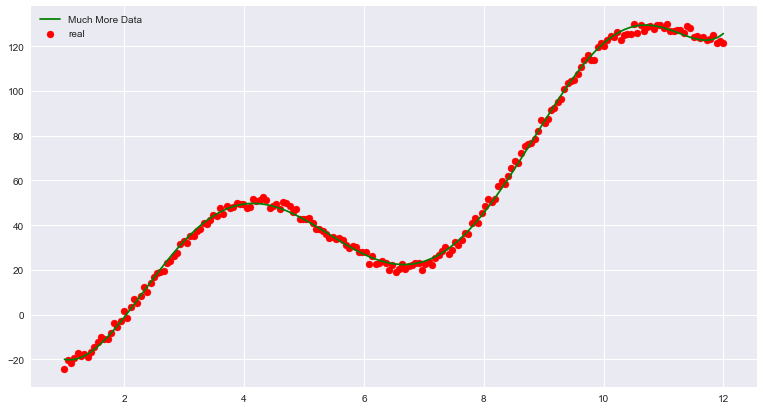

In [124]:
Polynomia_7 = PolynomialFeatures(degree=7)
x_polynomia7 = Polynomia_7.fit_transform(x.reshape(-1,1)) # 数据的转换(训练集)

model = LinearRegression()
model.fit(x_polynomia7,y)
# 模型的预测
model_pre = model.predict(x_polynomia7)
# 绘图
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x,y,c='red',label='real') # 画出原图
plt.plot(x,model_pre,c='green',label='Much More Data')
plt.legend()

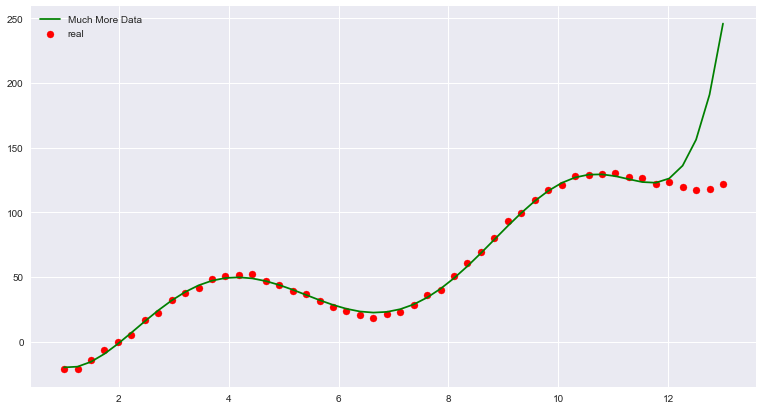

In [128]:
# 延拓看一下效果
x_test = np.linspace(1, 13, 50)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(50)

Polynomia_7 = PolynomialFeatures(degree=7)
x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1)) # 数据的转换(训练集)

# 模型的预测
model_pre = model.predict(x_test_polynomia7)
# 绘图
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图
plt.plot(x_test,model_pre,c='green',label='Much More Data')
plt.legend()

## 使用简单模型进行回归

In [19]:
err_list_simple = [] # Ridge回归的误差
rkf = model_selection.RepeatedKFold(n_splits=5, n_repeats=50, random_state=777) # 这里返回的是index
model = LinearRegression()
for train_index, test_index in rkf.split(x):
    # 计算每次的误差
    # 模型的拟合
    model.fit(x[train_index].reshape(-1,1),y[train_index]) # 计算模型参数
    # 模型的测试
    model_pre = model.predict(x[test_index].reshape(-1,1)) # 在测试集上预测
    err = mean_squared_error(model_pre,y[test_index]) # 计算误差
    err_list_simple.append(err)

In [13]:
np.mean(err_list_simple)

3347.528581588092

In [14]:
np.std(err_list_simple)

1605.3739412586021

## 整体比较

{'whiskers': [<matplotlib.lines.Line2D at 0x19b5bdb42e8>,
 'caps': [<matplotlib.lines.Line2D at 0x19b5bdb49e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b5bed1eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x19b5bdb4e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x19b5bedf4a8>,
 'means': []}

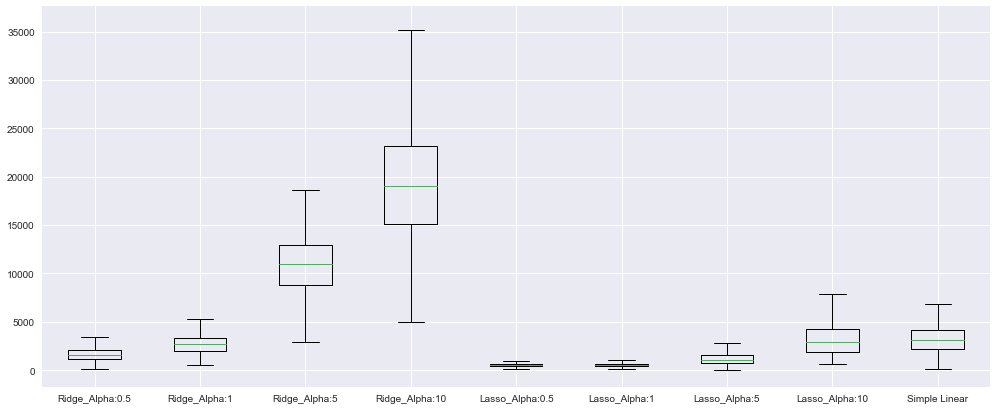

In [20]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(17,7))
ax = fig.add_subplot(1, 1, 1)

err_lists = err_list_Ridge+err_list_Lasso+[err_list_simple]
pic_labels = ["Ridge_Alpha:{}".format(i) for i in alpha_list] + ["Lasso_Alpha:{}".format(i) for i in alpha_list] + ['Simple Linear']
ax.boxplot(err_lists, labels=pic_labels)

## 使用最好的参数在整个训练集上训练

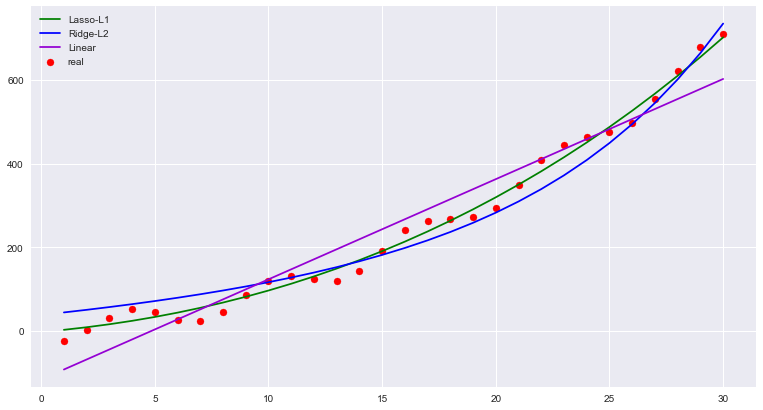

In [21]:
# ---------
# 模型的定义
# ---------
model_lasso = Lasso(alpha=0.5,normalize=True)
model_Ridge = Ridge(alpha=0.5,normalize=True)
model_linear = LinearRegression()

# ----------------------------------
# 模型的训练, 使用整个训练集进行训练
# ----------------------------------
x_polynomia7 = Polynomia_7.fit_transform(x.reshape(-1,1))
model_lasso.fit(x_polynomia7,y)
model_Ridge.fit(x_polynomia7,y)
model_linear.fit(x.reshape(-1,1),y)

# ----
# 绘图
# ----
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

model1_pre = model_lasso.predict(x_polynomia7)
model2_pre = model_Ridge.predict(x_polynomia7)
model3_pre = model_linear.predict(x.reshape(-1,1))

plt.scatter(x,y,c='red',label='real') # 画出原图
plt.plot(x,model1_pre,c='green',label='Lasso-L1') # 未使用正则化
plt.plot(x,model2_pre,c='blue',label='Ridge-L2') # l1范数
plt.plot(x,model3_pre,c='darkviolet',label='Linear') # l2范数
plt.legend()

## 延拓看一下看一下效果

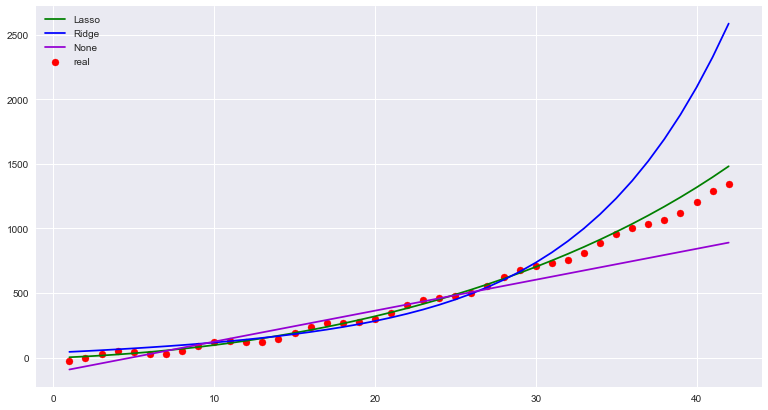

In [28]:
# ---------
# 模型的定义
# ---------
model_lasso = Lasso(alpha=0.5,normalize=True)
model_Ridge = Ridge(alpha=0.5,normalize=True)
model_linear = LinearRegression()

# ----------------------------------
# 模型的训练, 使用整个训练集进行训练
# ----------------------------------
x_polynomia7 = Polynomia_7.fit_transform(x.reshape(-1,1))
model_lasso.fit(x_polynomia7,y)
model_Ridge.fit(x_polynomia7,y)
model_linear.fit(x.reshape(-1,1),y)

# ---------
# 预测的数据集
# ---------
x_test = np.linspace(1, 42, 42)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(42)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

# ----
# 绘图
# ----
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

model1_pre = model_lasso.predict(x_test_polynomia7)
model2_pre = model_Ridge.predict(x_test_polynomia7)
model3_pre = model_linear.predict(x_test.reshape(-1,1))

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图
plt.plot(x_test,model1_pre,c='green',label='Lasso') # 未使用正则化
plt.plot(x_test,model2_pre,c='blue',label='Ridge') # l1范数
plt.plot(x_test,model3_pre,c='darkviolet',label='None') # l2范数
plt.legend()

In [32]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5) #设精度为5

In [33]:
model_lasso.coef_

array([0.     , 4.68547, 0.47718, 0.00464, 0.     , 0.     , 0.     ,
       0.     ])

In [34]:
model_Ridge.coef_

array([0.     , 5.75731, 0.15023, 0.00413, 0.00011, 0.     , 0.     ,
       0.     ])